In [170]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [171]:
df = pd.read_csv('train.csv')


In [172]:
import pandas as pd

# Supondo que 'data' seja o seu DataFrame e 'engine_capacity' seja o nome da coluna
# Substitua 'data' e 'engine_capacity' com os seus dados reais
valores_unicos = df['mileage'].unique()

print("Valores únicos na coluna 'engine_capacity':")
print(valores_unicos)


Valores únicos na coluna 'engine_capacity':
['23.84 kmpl' '17.5 kmpl' '17.4 kmpl' '14.08 kmpl' '21.4 kmpl'
 '17.66 kmpl' '17.52 kmpl' '16.09 kmpl' '22.48 kmpl' '18.24 kmpl'
 '21.74 kmpl' '19.27 kmpl' '23.01 kmpl' '21.5 kmpl' '22.38 kmpl' '18 kmpl'
 '22.41 kmpl' '11 kmpl' '27.39 kmpl' '16.55 kmpl' '19 kmpl' '23.59 kmpl'
 '15.1 kmpl' '18.6 kmpl' nan '20.36 kmpl' '16.38 kmpl' '18.2 kmpl'
 '22.77 kmpl' '17 kmpl' '17.6 kmpl' '18.15 kmpl' '19.34 kmpl' '11.3 kmpl'
 '20.7 kmpl' '22.9 kmpl' '14.84 kmpl' '20.71 kmpl' '17.7 kmpl' '15.8 kmpl'
 '17.05 kmpl' '18.16 kmpl' '16 kmpl' '18.7 kmpl' '14.8 kmpl' '15.74 kmpl'
 '18.3 kmpl' '15.6 kmpl' '15.68 kmpl' '18.9 kmpl' '24.2 kmpl' '14.11 kmpl'
 '16.35 kmpl' '22.05 kmpl' '17.01 kmpl' '23.95 kmpl' '19.17 kmpl'
 '17.8 kmpl' '20 kmpl' '26.1 kmpl' '19.67 kmpl' '12.8 kmpl' '22.07 kmpl'
 '26.2 kmpl' '18.06 kmpl' '14.5 kmpl' '34.05 kmpl' '20.51 kmpl' '33 kmpl'
 '13.68 kmpl' '16.36 kmpl' '25.8 kmpl' '17.3 kmpl' '21.21 kmpl'
 '16.47 kmpl' '13.9 kmpl' '23 kmpl' '

In [173]:
# SEATS __________________________________________________
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)

df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI']), 'seats'] = 5
df.loc[df['full_name'] == '2008 Ford Endeavour 3.0 4x4 Thunder Plus', 'seats'] = 7

distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)


# ENGINE __________________________________________________
df['engine_capacity'] = df['engine_capacity'].str.replace('cc', '')


# KMS __________________________________________________
df['kms_driven'] = df['kms_driven'].str.replace('Kms', '')
df['kms_driven'] = df['kms_driven'].str.replace(',', '').str.strip()

# MAX POWER 
Correct_Max_Power = []
for power in df['max_power']:
    if pd.notna(power):
        if isinstance(power, str):
            if 'bhp' in power:
                num_bhp = float(re.search(r'\d+.?\d', power).group())
                Correct_Max_Power.append(num_bhp)
            elif 'PS' in power:
                num_ps = float(re.search(r'\d+.?\d', power).group())
                num_bhp = round(num_ps * 0.98632, 2)
                Correct_Max_Power.append(num_bhp)
            else:
                num = re.search(r'\d+\.?\d*', power)
                Correct_Max_Power.append(float(num.group()) if num else None)
        else:
            Correct_Max_Power.append(power)
    else:
        Correct_Max_Power.append(None)

Correct_Max_Power = [float(value) if value is not None else value for value in Correct_Max_Power]
df['max_power'] = Correct_Max_Power



# MILEAGE __________________________________________________
consumo_correto = []

for i in df['mileage']:
    match = re.search(r'(\d+.\d+|\d+)', str(i))

    if match:
        valor = float(match.group())

        if 'km/kg' in str(i):
            valor *= 1.40

        consumo_correto.append(valor if pd.notnull(i) else None)

while len(consumo_correto) < len(df):
    consumo_correto.append(None)

df['mileage'] = consumo_correto

media_mileage = df['mileage'].astype(float).mean()
df['mileage'].fillna(media_mileage, inplace=True)

# OWNER TYPE __________________________________________________

# Substituir os valores em branco ('') pela moda ('mode') da coluna 'owner_type'
moda_owner_type = df['owner_type'].mode()[0]  # Calcula a moda
df['owner_type'].replace('', moda_owner_type, inplace=True)

# INSURANCE __________________________________________________
#Deletar "insurance"
df['insurance'] = df['insurance'].str.replace('insurance', '')

#Substituir valores em branco e valores numéricos por 'No Insurance'
df['insurance'] = df['insurance'].apply(lambda x: 'No Insurance' if pd.isnull(x) or pd.api.types.is_numeric_dtype(x) else x)

#Corrigir "Third Party" com espaço extra
df['insurance'] = df['insurance'].str.replace('Third Party ', 'Third Party')







Distinct full names with blank seats:
2009 Maruti Estilo LXI
2019 Nissan Kicks Diesel
2008 Ford Endeavour 3.0 4x4 Thunder Plus
2010 Maruti Estilo LXI

Distinct full names with blank seats:


In [174]:
import pandas as pd

# Seu DataFrame 'df' com a coluna 'full_name'

# Extrair 'ano' da coluna 'full_name'
df['ano'] = df['full_name'].str.extract(r'^(\d{4})')

# Extrair 'marca' da coluna 'full_name'
df['marca'] = df['full_name'].str.extract(r'\d{4}\s(\w+(?:-\w+)?)')

# Extrair 'modelo' sem incluir o ano
df['modelo'] = df['full_name'].str.extract(r'\d{4}\s.*?\s(.*)')

# Exibir o DataFrame resultante
print(df[['ano', 'marca', 'modelo']])





        ano    marca                                         modelo
0      2019     Tata                                  Tiago XZ Plus
1      2018    Honda                                 WR-V i-VTEC VX
2      2015    Honda                                 City i VTEC SV
3      2021     Tata  New Safari XZA Plus Adventure Edition AT BSVI
4      2019   Maruti                            Baleno 1.2 CVT Zeta
...     ...      ...                                            ...
13951  2021      Kia                               Carnival Premium
13952  2017  Hyundai                        i20 1.2 Magna Executive
13953  2017    Skoda                    Rapid 1.5 TDI Ambition BSIV
13954  2017   Maruti                              Vitara Brezza ZDi
13955  2015    Honda                                Amaze S i-Vtech

[13956 rows x 3 columns]


In [175]:
valores_unicos = df['marca'].unique()
print(valores_unicos)

['Tata' 'Honda' 'Maruti' 'BMW' 'Hyundai' 'Volkswagen' 'Renault'
 'Mercedes-Benz' 'Mahindra' 'Ford' 'Toyota' 'MG' 'Jaguar' 'Datsun'
 'Chevrolet' 'Kia' 'Land' 'Nissan' 'Skoda' 'Mitsubishi' 'Volvo' 'Audi'
 'Citroen' 'Jeep' 'Force' 'Fiat' 'Lexus' 'Mini' 'Isuzu' 'OpelCorsa'
 'Porsche' 'Bentley' 'Hindustan' 'Daewoo']


In [176]:
contagem_nulos = df.isnull().sum()

print(f"O número de valores nulos na coluna é: {contagem_nulos}")

O número de valores nulos na coluna é: full_name             0
registered_year      54
engine_capacity       9
insurance             0
transmission_type     0
kms_driven            3
owner_type           36
fuel_type             0
max_power            89
seats                 0
mileage               0
body_type             0
city                  0
resale_price_Lakh     0
ano                   0
marca                 0
modelo                0
dtype: int64


In [177]:
#BODY TYPE ----------------------
#Replace the missing types and the ones that were wrong
df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI', '2019 Maruti Wagon R ZXI AMT 1.2BSIV',
                             '2016 Mercedes-Benz B Class B180 Sport', '2016 Mercedes-Benz A Class A200 D Sport Edition',
                             '2004 Tata Indigo Marina GLX', '2017 Volvo V40 D3 R Design']), 'body_type'] = 'Hatchback'
df.loc[df['full_name'].isin(['2005 Tata Sumo Victa EX 10/7 Str BSII', '2008 Tata Sumo CX', '2010 Tata New Safari DICOR 2.2 EX 4x2', 
                             '2017 Mahindra KUV 100 mFALCON G80 K8', '2019 Mahindra Bolero Camper GOLD ZX 2WD']), 'body_type'] = 'SUV'
df.loc[df['full_name'].isin(['2015 Honda Mobilio E i-DTEC', '2018 Maruti Eeco 5 Seater AC BSIV', '2016 Datsun GO Plus A']), 'body_type'] = 'MUV'
df.loc[df['full_name'].isin(['2021 BMW 7 Series 730Ld DPE Signature','2006 Hyundai Accent CRDi', '2007 Maruti SX4 Vxi BSIII',
                             '2020 Mercedes-Benz S-Class Maybach S560', '2004 Skoda Octavia 1.8 Turbo Petrol RS MT']), 'body_type'] = 'Sedan'
df.loc[df['full_name'].isin(['2012 Mercedes-Benz SLK-Class SLK 350', '2013 Mercedes-Benz E-Class E350 Cabriolet', 
                             '2009 Mercedes-Benz SLK-Class 55 AMG']), 'body_type'] = 'Convertibles'
df.loc[df['full_name'] == '2011 Jaguar XK R V8 Coupe', 'body_type'] = 'Coupe'
df.loc[df['full_name'].isin(['2015 Chevrolet Enjoy 1.4 LS 7', '2004 Maruti Versa DX2 8-SEATER BSIII TWIN A/C', '2021 Maruti Eeco 5 STR With AC Plus HTR CNG',
                             '2022 Maruti Eeco 5 Seater AC 2020-2022', '2022 Maruti Eeco 5 Seater AC BSVI', '2017 Maruti Eeco Flexi Green', 
                             '2013 Maruti Omni Limited Edition', '2021 Maruti Eeco CNG 5 Seater AC', '2019 Maruti Eeco CNG 5 Seater AC BSIV', 
                             '2019 Maruti Eeco 5 Seater AC', '2013 Maruti Eeco 5 Seater Standard BSIV', '2015 Maruti Omni CNG', 
                             '2015 Maruti Omni MPI CARGO BSIV', '2016 Maruti Eeco CNG 5 Seater AC BSIV', '2013 Toyota Innova 2.5 E Diesel MS 7-seater',
                             '2015 Chevrolet Enjoy 1.4 LS 7']), 'body_type'] = 'Minivans'
df.loc[df['full_name'].isin(['2014 Tata Xenon XT EX 4X2', '2019 Isuzu D-Max High']), 'body_type'] = 'Pickup'

# Check
distinct_full_names_with_blank_body_type = df[df['body_type'].isnull()]['full_name'].unique()
print('Distinct full names with blank body_type:')
for full_name in distinct_full_names_with_blank_body_type:
    print(full_name)

Distinct full names with blank body_type:


In [178]:
# Mudar formatos

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'marca': 'string',
    'modelo': 'string',
    'body_type': 'string',
    'mileage': float,
})

In [179]:

novo_valor = df['mileage'].mean()
df['mileage'] = df['mileage'].fillna(novo_valor)

In [180]:
novo_valor = df['engine_capacity'].mean()
df['engine_capacity'] = df['engine_capacity'].fillna(novo_valor)

In [181]:
novo_valor = df['max_power'].mean()
df['max_power'] = df['max_power'].fillna(novo_valor)

In [182]:
novo_valor = df['kms_driven'].mean()
df['kms_driven'] = df['kms_driven'].fillna(novo_valor)

In [183]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)

Data type by column:
full_name                    object
registered_year              object
engine_capacity             float64
insurance                    object
transmission_type            object
kms_driven                  float64
owner_type                   object
fuel_type                    object
max_power                   float64
seats                       float64
mileage                     float64
body_type            string[python]
city                         object
resale_price_Lakh           float64
ano                         float64
marca                string[python]
modelo               string[python]
dtype: object


In [184]:
df = df.dropna(subset=['registered_year'])
# MARCA __________________________________________________
#df = df.dropna(subset=['marca'])"
# MODELO __________________________________________________
#df = df.dropna(subset=['modelo'])

In [185]:
# Change formats

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'marca': 'string',
    'modelo': 'string',
   
})

In [186]:
# Obter os valores únicos da coluna 'marca'
valores_unicos_marca = df['marca'].unique()

# Exibir os valores únicos da coluna 'marca'
print(valores_unicos_marca)



<StringArray>
[         'Tata',         'Honda',        'Maruti',           'BMW',
       'Hyundai',    'Volkswagen',       'Renault', 'Mercedes-Benz',
      'Mahindra',          'Ford',        'Toyota',            'MG',
        'Jaguar',        'Datsun',     'Chevrolet',           'Kia',
          'Land',        'Nissan',         'Skoda',    'Mitsubishi',
         'Volvo',          'Audi',       'Citroen',          'Jeep',
         'Force',          'Fiat',         'Lexus',          'Mini',
         'Isuzu',     'OpelCorsa',       'Porsche',       'Bentley',
        'Daewoo']
Length: 33, dtype: string


In [187]:
#brands = df['marca'].tolist()

# Define the criteria for categorization
cheap_brands = ['Tata','Hindustan', 'Maruti', 'Daewoo','Renault', 'Datsun', 'Chevrolet', 'Kia', 'Nissan', 'Mitsubishi', 'Skoda', 'Force', 'Fiat', 'Hindustan', 'Daewoo']
medium_brands = ['Honda','Force','Mahindra', 'Hyundai', 'Volkswagen', 'Ford', 'MG', 'Toyota', 'Land', 'Volvo', 'Citroen', 'Jeep', 'Isuzu', 'OpelCorsa']
high_end_brands = ['BMW','Mercedes-Benz','Lexus', 'Bentley','Mercedes', 'Jaguar', 'Lexus', 'Mini', 'Audi', 'Porsche', 'Bentley']

def categoria_marca(brand):
    if brand in cheap_brands:
        return 'Cheap'
    elif brand in medium_brands:
        return 'Medium'
    elif brand in high_end_brands:
        return 'High-End'
    else:
        return 'Uncategorized'

# Apply the categorization function to create a new column
df['categoria_marca'] = df['marca'].apply(categoria_marca)

# Print or use the resulting DataFrame
print(df[['marca','categoria_marca']])
# Identifica as marcas classificadas como 'Uncategorized'
marcas_uncategorized = df[df['categoria_marca'] == 'Uncategorized']['marca'].unique()

# Imprime as marcas classificadas como 'Uncategorized'
print("Marcas classificadas como 'Uncategorized':")
print(marcas_uncategorized)

         marca categoria_marca
0         Tata           Cheap
1        Honda          Medium
2        Honda          Medium
3         Tata           Cheap
4       Maruti           Cheap
...        ...             ...
13951      Kia           Cheap
13952  Hyundai          Medium
13953    Skoda           Cheap
13954   Maruti           Cheap
13955    Honda          Medium

[13902 rows x 2 columns]
Marcas classificadas como 'Uncategorized':
<StringArray>
[]
Length: 0, dtype: string


In [188]:
import pandas as pd

# Supondo que você já tenha um DataFrame df com as colunas 'marca' e 'modelo'

# Valores únicos na coluna 'marca'
valores_unicos = df['marca'].unique()

# Criando rótulos para os grupos
rotulos = ['Grupo_' + str(i) for i in range(1, len(valores_unicos) + 1)]

# Agrupando os valores da coluna 'modelo' por cada marca correspondente
grupo_modelo = df.groupby('marca')['modelo'].apply(list).reset_index(name='modelos')

# Adicionando uma nova coluna com a correspondência dos grupos
grupo_modelo['grupo_modelos'] = rotulos

# Mesclando os dados originais com as informações dos grupos
df = df.merge(grupo_modelo[['marca', 'grupo_modelos']], on='marca', how='left')

# Resultado final
print(df)


                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13897                          2021 Kia Carnival Premium            2021   
13898               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13899             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13900                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13901                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity      insurance transmission_type  kms_driven  \
0               

In [189]:
# Supondo que você já tenha o DataFrame df com a coluna 'grupo' adicionada

# Obtendo os valores únicos da coluna 'grupo'
valores_grupos_unicos = df['grupo_modelos'].unique()

# Exibindo os valores únicos da coluna 'grupo'
print("Valores únicos da coluna 'grupo':", valores_grupos_unicos)


Valores únicos da coluna 'grupo': ['Grupo_30' 'Grupo_11' 'Grupo_21' 'Grupo_2' 'Grupo_12' 'Grupo_32'
 'Grupo_28' 'Grupo_22' 'Grupo_20' 'Grupo_10' 'Grupo_31' 'Grupo_19'
 'Grupo_14' 'Grupo_7' 'Grupo_4' 'Grupo_16' 'Grupo_17' 'Grupo_25'
 'Grupo_29' 'Grupo_24' 'Grupo_33' 'Grupo_1' 'Grupo_5' 'Grupo_15' 'Grupo_9'
 'Grupo_8' 'Grupo_18' 'Grupo_23' 'Grupo_13' 'Grupo_26' 'Grupo_27'
 'Grupo_3' 'Grupo_6']


In [190]:
# Contando o número de valores únicos na coluna 'marca'
num_valores_unicos = df['marca'].nunique()

# Exibindo o número de valores únicos na coluna 'marca'
print("Número de valores únicos na coluna 'marca':", num_valores_unicos)


Número de valores únicos na coluna 'marca': 33


In [191]:
# Verificar valores nulos em todo o DataFrame
nulos_df = df.isnull().sum()

# Exibir a contagem de valores nulos por coluna
print(nulos_df)

full_name            0
registered_year      0
engine_capacity      0
insurance            0
transmission_type    0
kms_driven           0
owner_type           0
fuel_type            0
max_power            0
seats                0
mileage              0
body_type            0
city                 0
resale_price_Lakh    0
ano                  0
marca                0
modelo               0
categoria_marca      0
grupo_modelos        0
dtype: int64


In [192]:
#Create ID IDF  

# FUEL TYPE __________________________________________________

fuel_types = df['fuel_type']
n_docs = len(df)
idf = {}

# Uniques
unique_fuel_types = fuel_types.drop_duplicates()

print("FUEL TYPE".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  
    idf[fuel_type] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column 
df['id_fuel_type'] = df['fuel_type'].map(idf)


print(df)


____________________FUEL TYPE_____________________
         Petrol: 0.18705300189294208
         Diesel: 0.5001184047638285
            CNG: 1.5366959190630143
       Electric: 2.461836046798032
            LPG: 2.781349448156026
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13897                          2021 Kia Carnival Premium            2021   
13898               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13899             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13900     

In [193]:
# categoria_marca __________________________________________________

fuel_types = df['categoria_marca']

n_docs = len(df)

idf = {}

# Uniques
unique_fuel_types = fuel_types.drop_duplicates()

print("categoria_marca".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  
    idf[fuel_type] = np.log10(n_docs / (k + 1))   #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column
df['id_categoria_marca'] = df['categoria_marca'].map(idf)

print(df)

_________________categoria_marca__________________
          Cheap: 0.35682288838383897
         Medium: 0.31242447037619475
       High-End: 1.134051542086709
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13897                          2021 Kia Carnival Premium            2021   
13898               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13899             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13900                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
1390

In [194]:
# OWNER TYPE __________________________________________________

owner_types = df['owner_type']
n_docs = len(df)

idf = {}
# Uniques
unique_owner_types = owner_types.drop_duplicates()

for owner_type in unique_owner_types:
    k = sum(owner_type == val for val in owner_types) 
    idf[owner_type] = np.log10(n_docs / (k + 1))  

for owner_type, value in idf.items():
    print(f'{owner_type:>15}: {value:>10}')
# Create new column 
df['id_owner_type'] = df['owner_type'].map(idf)

print(df)

    First Owner: 0.15304938540332447
    Third Owner: 1.3478926944911953
   Second Owner: 0.616479575070167
    Fifth Owner: 2.563293687556809
   Fourth Owner: 2.1016845990153943
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13897                          2021 Kia Carnival Premium            2021   
13898               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13899             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13900                      2017 Maruti Vitara Brezza ZDi     

In [195]:
# INSURANCE __________________________________________________

insurance = df['insurance']
n_docs = len(df)
idf = {}

# Uniques
unique_insurance = insurance.drop_duplicates()

for insurance in unique_insurance:
    k = sum(insurance in row for row in df['insurance'])  
    idf[insurance] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for insurance, value in idf.items():
    print(f'{insurance:>15}: {value:>10}')

# Create new column 
df['id_insurance'] = df['insurance'].map(idf)

    Third Party: 0.2604389224775805
       Zero Dep: 1.3196030550033182
  Comprehensive: 0.4381549929502174
  Not Available: 1.4220915400198801
              1: 3.364926033789976
              2: 3.5410172928456567
   No Insurance: 3.364926033789976


In [196]:
# CITY __________________________________________________

city= df['city']
n_docs = len(df)
idf = {}

# Uniques
unique_cities = city.drop_duplicates()

for city in unique_cities:
    k = sum(city in row for row in df['city'])  
    idf[city] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for city, value in idf.items():
    print(f'{city:>15}: {value:>10}')

# Create new column 
df['id_city'] = df['city'].map(idf)

           Pune: 1.0911533681275127
         Jaipur: 1.2893790723974448
         Mumbai: 0.9167351970099885
        Kolkata: 1.1722656733011014
          Delhi: 0.7606999807055055
      Bangalore: 0.8696130115522729
      Hyderabad: 1.0334987372692326
        Chennai: 1.1310841695143623
        Gurgaon: 1.220871006734603
     Chandigarh: 1.6040011853808425
      Ahmedabad: 1.1181813240661342
        Lucknow: 1.5086000140128877
           Agra: 1.8902242531937261


In [197]:
# MODELO _____________________________________

modelos = df['grupo_modelos']
n_docs = len(df)
idf = {}

# Uniques
unique_modelos = modelos.unique()

for modelo in unique_modelos:
    k = sum(modelo == val for val in modelos)  
    idf[modelo] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

# Create new column 
df['id_modelos'] = df['grupo_modelos'].map(idf)

print(df)


                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13897                          2021 Kia Carnival Premium            2021   
13898               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13899             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13900                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13901                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity      insurance transmission_type  kms_driven  \
0               

In [198]:
#BODY TYPE __________________

body_type = df['body_type']
n_docs = len(df)
idf = {}

# Uniques
unique_body_type = body_type.drop_duplicates()

for body_type in unique_body_type:
    k = sum(body_type in row for row in df['body_type']) 
    idf[body_type] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for body_type, value in idf.items():
    print(f'{body_type:>15}: {value:>10}')

# Create new column 
df['id_body_type'] = df['body_type'].map(idf)

print(df)

      Hatchback: 0.3742912372656051
            SUV: 0.5971519548177764
          Sedan: 0.5614689181415616
            MUV: 1.362759972033468
       Minivans: 2.310568371467383
   Convertibles: 3.364926033789976
          Coupe: 3.0638960381259945
         Pickup: 3.0638960381259945
          Wagon: 3.6659560294539566
           Cars: 3.4441072798376005
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13897                          2021 Kia Carnival Premium            2021   
13898               2017 Hyundai i2

In [199]:
# Transmissao _____________________________________

transmissao = df['transmission_type']

n_docs = len(df)


transmissao_counts = transmissao.value_counts()

idf = {}

for tipo_transmissao, count in transmissao_counts.items():
    idf[tipo_transmissao] = np.log10(n_docs / (count + 1))  #+1 to avoid division by zero

# Create new column 
df['id_transmissao'] = df['transmission_type'].map(idf)


print(df)

                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13897                          2021 Kia Carnival Premium            2021   
13898               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13899             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13900                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13901                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity      insurance transmission_type  kms_driven  \
0               

In [200]:

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'marca': 'string',
    'modelo': 'string',
    'id_categoria_marca': float,
})

In [201]:
contagem_nulos = df.isnull().sum()

print(f"O número de valores nulos na coluna é: {contagem_nulos}")

O número de valores nulos na coluna é: full_name             0
registered_year       0
engine_capacity       0
insurance             0
transmission_type     0
kms_driven            0
owner_type            0
fuel_type             0
max_power             0
seats                 0
mileage               0
body_type             0
city                  0
resale_price_Lakh     0
ano                   0
marca                 0
modelo                0
categoria_marca       0
grupo_modelos         0
id_fuel_type          0
id_categoria_marca    0
id_owner_type         0
id_insurance          0
id_city               0
id_modelos            0
id_body_type          0
id_transmissao        0
dtype: int64


In [202]:
# Encontrar os valores únicos na coluna 'marca'
valores_unicos_marca = df['marca'].unique()

# Exibir os valores únicos da coluna 'marca'
print("Valores únicos na coluna 'marca':")
print(valores_unicos_marca)

Valores únicos na coluna 'marca':
<StringArray>
[         'Tata',         'Honda',        'Maruti',           'BMW',
       'Hyundai',    'Volkswagen',       'Renault', 'Mercedes-Benz',
      'Mahindra',          'Ford',        'Toyota',            'MG',
        'Jaguar',        'Datsun',     'Chevrolet',           'Kia',
          'Land',        'Nissan',         'Skoda',    'Mitsubishi',
         'Volvo',          'Audi',       'Citroen',          'Jeep',
         'Force',          'Fiat',         'Lexus',          'Mini',
         'Isuzu',     'OpelCorsa',       'Porsche',       'Bentley',
        'Daewoo']
Length: 33, dtype: string


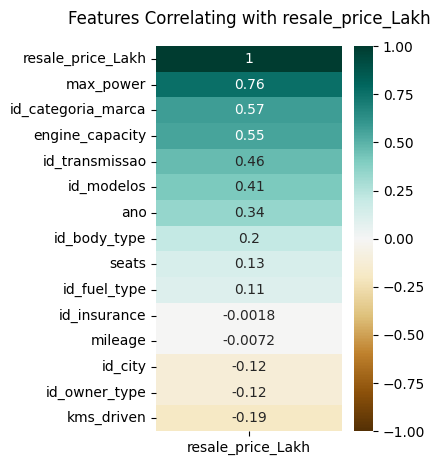

In [203]:
#correlation  

# Select columns
columns_of_interest = ['id_transmissao', 'id_body_type','id_modelos','id_categoria_marca', 'mileage','ano','id_city','id_insurance','seats','engine_capacity','id_fuel_type','kms_driven','max_power','id_owner_type','resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()

In [204]:
#Export
#Not the target
colunas_selecionadas = ['id_transmissao', 'id_body_type','id_modelos','id_categoria_marca', 'mileage','ano','id_city','id_insurance','seats','engine_capacity','id_fuel_type','kms_driven','max_power','id_owner_type','resale_price_Lakh']


if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('Acenario2Ideia2MapeamentoFull23.csv', index=False)

In [205]:
df.columns

Index(['full_name', 'registered_year', 'engine_capacity', 'insurance',
       'transmission_type', 'kms_driven', 'owner_type', 'fuel_type',
       'max_power', 'seats', 'mileage', 'body_type', 'city',
       'resale_price_Lakh', 'ano', 'marca', 'modelo', 'categoria_marca',
       'grupo_modelos', 'id_fuel_type', 'id_categoria_marca', 'id_owner_type',
       'id_insurance', 'id_city', 'id_modelos', 'id_body_type',
       'id_transmissao'],
      dtype='object')

In [206]:
#Export
#Not the target
colunas_selecionadas = ['full_name','transmission_type','id_transmissao','body_type','id_body_type','modelo','grupo_modelos','id_modelos','marca','categoria_marca','id_categoria_marca', 'mileage','ano','city','id_city','insurance','id_insurance','seats','engine_capacity','fuel_type','id_fuel_type','kms_driven','max_power','owner_type','id_owner_type','resale_price_Lakh']


if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('todasIdeia23.csv', index=False)